In [1]:
import numpy as np
import matplotlib.pyplot as plt
import csv
import pandas as pd

In [2]:
#with open('train.csv') as train_file:
 #   train_reader=csv.reader(train_file, delimiter=',')
  #  #for line in train_reader:
   #     print (line)

In [233]:
train_dt=pd.read_csv('train.csv', skiprows=1, names=["pass_num", "surv", "class", "name", "sex", "age", "sib", "parch", "ticket", "fare", "cabin", "embarked"])

train_dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
pass_num    891 non-null int64
surv        891 non-null int64
class       891 non-null int64
name        891 non-null object
sex         891 non-null object
age         714 non-null float64
sib         891 non-null int64
parch       891 non-null int64
ticket      891 non-null object
fare        891 non-null float64
cabin       204 non-null object
embarked    889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [235]:
train_dt=train_dt.set_index("pass_num")

train_dt.head(10)

,surv,class,name,sex,age,sib,parch,ticket,fare,cabin,embarked
pass_num,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S


In [1]:

#train_dt.plot(kind='bar',x='sex',y='surv')
#plt.show()

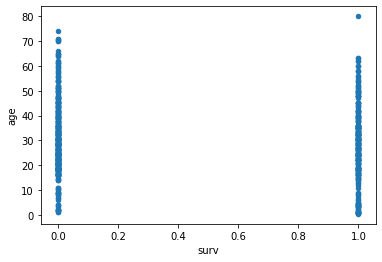

In [55]:

train_dt.plot(kind='scatter',x='surv',y='age')
plt.show()

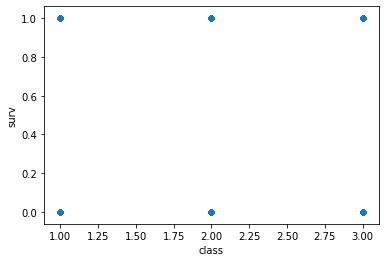

In [6]:
train_dt.plot(kind='scatter',x='class',y='surv')
plt.show()

In [7]:
total_f=0
surv_f=0
sex_data=list(train_dt['sex'])
surv_data=list(train_dt['surv'])
for count in range(len(sex_data)):  
    if sex_data[count]=='female':
        total_f+=1
        if surv_data[count]==1:
            surv_f+=1
        
print(total_f)
print(surv_f)
print("Total Female Survived: %2.f"%((surv_f/total_f)*100),'%')

314
233
Total Female Survived: 74 %


In [213]:
total_m=0
surv_m=0
sex_data=list(train_dt['sex'])
surv_data=list(train_dt['surv'])
for count in range(len(sex_data)):  
    if sex_data[count]=='male':
        total_m+=1
        if surv_data[count]==1:
            surv_m+=1
        
print(total_m)
print(surv_m)
print("Total Male Survived: %2.f"%((surv_m/total_m)*100),'%')

577
109
Total Male Survived: 19 %


In [237]:
surv_c=0
class_data=list(train_dt['class'])
surv_data=list(train_dt['surv'])
for count in range(len(class_data)):  
    if class_data[count]==3:
        if surv_data[count]==1:
            surv_c+=1
        
print(surv_c)


119


In [238]:
surv_c=0
class_data=list(train_dt['class'])
surv_data=list(train_dt['surv'])
for count in range(len(class_data)):  
    if class_data[count]==2:
       if surv_data[count]==1:
            surv_c+=1
        
print(surv_c)


87


In [239]:
surv_c=0
class_data=list(train_dt['class'])
surv_data=list(train_dt['surv'])
for count in range(len(class_data)):  
    if class_data[count]==1:
       if surv_data[count]==1:
            surv_c+=1
        
print(surv_c)


136


In [12]:
age_mean=train_dt['age'].mean()
age_std=train_dt['age'].std()
age_std
#train_dt.plot(kind='scatter',x='pass_num',y='age')
#plt.plot()
print(age_mean)

29.69911764705882


In [13]:
train_dt=train_dt.drop(['cabin'],axis=1)
train_dt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 10 columns):
surv        891 non-null int64
class       891 non-null int64
name        891 non-null object
sex         891 non-null object
age         714 non-null float64
sib         891 non-null int64
parch       891 non-null int64
ticket      891 non-null object
fare        891 non-null float64
embarked    889 non-null object
dtypes: float64(2), int64(4), object(4)
memory usage: 76.6+ KB


In [172]:
train_dt['age']=train_dt['age'].fillna(0)
#train_dt=train_dt.dropna()
#train_dt.info()
type(train_dt['age'])

pandas.core.series.Series

In [163]:
men_age=[]
female_age=[]
nan_m=0
age_data=list(train_dt['age'])
for c_age in range(891):
    if sex_data[c_age]=='male':
        #if age_data[c_age]=='nan':
            #nan_m+=1
        #else:
        men_age.append(age_data[c_age])
    elif sex_data[c_age]=='female':
        female_age.append(age_data[c_age])
        
len(men_age)
len(female_age)

314

In [81]:
#for c_age in train_dt["pass_num"]:
 #   print(c_age)


In [137]:
for value in range(1,len(men_age)):

    if men_age[value] <= 0:
        del men_age[value]

mean_menage=np.mean(men_age)
mean_menage

30.72664459161148

In [118]:
for value_f in range(len(female_age)):

    if female_age[value_f] <= 0:
        del female_age[value_f]

mean_femage=np.mean(female_age)
mean_femage

27.915708812260537

In [212]:
for age_f in range(1,891):
    if train_dt['sex'][age_f]=="male" and train_dt['age'][age_f]<=0:
            train_dt['age'].replace(0.0,31, inplace=True)
    elif train_dt['sex'][age_f]=="female" and train_dt['age'][age_f]<=0:
            train_dt['age'].replace(0.0,28, inplace=True)

train_dt.head(5)

        

,surv,class,name,sex,age,sib,parch,ticket,fare,cabin,embarked
pass_num,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [178]:
train_dt['age'][5]

35.0

In [206]:
total_f1=0
total_f2=0
total_f3=0

surv_f1=0
surv_f2=0
surv_f3=0
male_t=0
tt_f=0

sex_data=list(train_dt['sex'])
class_data=list(train_dt['class'])
surv_data=list(train_dt['surv'])

for count1 in range(891):  
    if sex_data[count1]=='female':
        tt_f+=1
        if class_data[count1]==1:
            total_f1+=1
            if surv_data[count1]==1:
                surv_f1+=1
        elif class_data[count1]==2:
            total_f2+=1
            if surv_data[count1]==1:
                surv_f2+=1
        elif class_data[count1]==3:
            total_f3+=1
            if surv_data[count1]==1:
                surv_f3+=1
    else:
        male_t+=1
        
print(male_t,tt_f)
print(total_f1,total_f2,total_f3)
print(surv_f1,surv_f2,surv_f3)

f1_s=round((surv_f1/total_f1),2)
f2_s=round((surv_f2/total_f2),2)
f3_s=round((surv_f3/total_f3),2)

print("First class female survivors",f1_s)
print("Second class female survivors",f2_s)
print("Third class female survivors",f3_s)


577 314
94 76 144
91 70 72
First class female survivors 0.97
Second class female survivors 0.92
Third class female survivors 0.5


In [214]:
surv_ch=0
total_ch=0
age_data=list(train_dt['age'])
surv_data=list(train_dt['surv'])
for counta in range(891):  
    if age_data[counta]<=18:
        total_ch+=1
        if surv_data[counta]==1:
            surv_ch+=1

print(total_ch,surv_ch)

print("Total Children survival:",surv_ch/total_ch)

139 70
Children survival: 0.5035971223021583


In [243]:
total_c1=0
total_c2=0
total_c3=0

surv_c1=0
surv_c2=0
surv_c3=0

for countc in range(891):  
    if age_data[countc]<=15:
        tt_f+=1
        if class_data[countc]==1:
            total_c1+=1
            if surv_data[countc]==1:
                surv_c1+=1
        elif class_data[countc]==2:
            total_c2+=1
            if surv_data[countc]==1:
                surv_c2+=1
        elif class_data[countc]==3:
            total_c3+=1
            if surv_data[countc]==1:
                surv_c3+=1
                

print(surv_c1,total_c1,surv_c2,total_c2,surv_c3,total_c3)                
c1_s=round((surv_c1/total_c1),2)
c2_s=round((surv_c2/total_c2),2)
c3_s=round((surv_c3/total_c3),2)

print("First class child survivors",c1_s)
print("Second class child survivors",c2_s)
print("Third class child survivors",c3_s)               
    

5 6 19 19 25 58
First class child survivors 0.83
Second class child survivors 1.0
Third class child survivors 0.43


In [225]:
total_m1=0
total_m2=0
total_m3=0

surv_m1=0
surv_m2=0
surv_m3=0

for countm in range(891):  
    if sex_data[countm]=='male':
        
        if class_data[countm]==1:
            total_m1+=1
            if surv_data[countm]==1:
                surv_m1+=1
        elif class_data[countm]==2:
            total_m2+=1
            if surv_data[countm]==1:
                surv_m2+=1
        elif class_data[countm]==3:
            total_m3+=1
            if surv_data[countm]==1:
                surv_m3+=1
                

print(surv_m1,total_m1,surv_m2,total_m2,surv_m3,total_m3)                
m1_s=round((surv_m1/total_m1),2)
m2_s=round((surv_m2/total_m2),2)
m3_s=round((surv_m3/total_m3),2)

print("First class Male survivors",m1_s)
print("Second class Male survivors",m2_s)
print("Third class Male survivors",m3_s)

45 122 17 108 47 347
First class Male survivors 0.37
Second class Male survivors 0.16
Third class Male survivors 0.14
